In [ ]:
import pandas as pd
import numpy as np

# df_train = pd.read_csv("/content/train_categorial_imp.csv")
df_test = pd.read_csv("/content/test_categorial_imp.csv")


In [ ]:
def data_and_labels(df):
  #creating targets vector
  labels = []
  for patient in df["patient"].unique():
    sep_vec = df[df["patient"]==patient]["SepsisLabel"]
    if sum(sep_vec) > 0:
      labels.append(1)
    else: 
      labels.append(0)
  df = df.drop(['patient','SepsisLabel'],axis=1)
  return df.to_numpy(), np.array(labels)

In [ ]:
def mean_imputation(df):
  df = df.replace(-999,np.nan)
  col_mean = df.mean()
  df_imp = df.fillna(col_mean)
  return df_imp

In [ ]:
df_train = mean_imputation(df_train)
df_test = mean_imputation(df_test)
X_train,y_train = data_and_labels(df_train)
X_val, y_val = data_and_labels(df_test)

NameError: ignored

In [ ]:
def create_samp_w(y_train):
  w = []
  for label in y_train:
    if label == 1:
      w.append(0.93)
    else:
      w.append(0.07)
  return w

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score,accuracy_score
# Create the SVM classifier
svm_clf = SVC()
weights = create_samp_w(y_train)
# Train the SVM classifier on the training set
svm_clf.fit(X_train,y_train,sample_weight=weights)
# y_train_pred = svm_clf.predict(X_train) 
y_pred = svm_clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print(f'accuracy score is: {acc:.2f}')

F1 score is: 0.26


In [ ]:
import pickle
file_name = "SVM_model.pkl"

# save
# pickle.dump(svm_clf, open(file_name, "wb"))

# load
svm_model_loaded = pickle.load(open(file_name, "rb"))


In [ ]:
df_test = pd.read_csv("/content/test_categorial_imp.csv")
df_test = mean_imputation(df_test)
X_val, y_val = data_and_labels(df_test)
y_pred = svm_model_loaded.predict(X_val)
df_train = pd.read_csv("/content/train_categorial_imp.csv")
df_train = mean_imputation(df_train)
X_train, y_train = data_and_labels(df_train)
train_pred = svm_model_loaded.predict(X_train)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
f1 = f1_score(y_val, y_pred)
print(f'F1 score is: {f1:.2f}')
acc = accuracy_score(y_val, y_pred)
print(f'accuracy score is: {acc:.2f}')

F1 score is: 0.13
accuracy score is: 0.26


              precision    recall  f1-score   support

     healthy       0.93      0.49      0.64     18585
        sick       0.07      0.54      0.13      1415

    accuracy                           0.49     20000
   macro avg       0.50      0.52      0.39     20000
weighted avg       0.87      0.49      0.60     20000



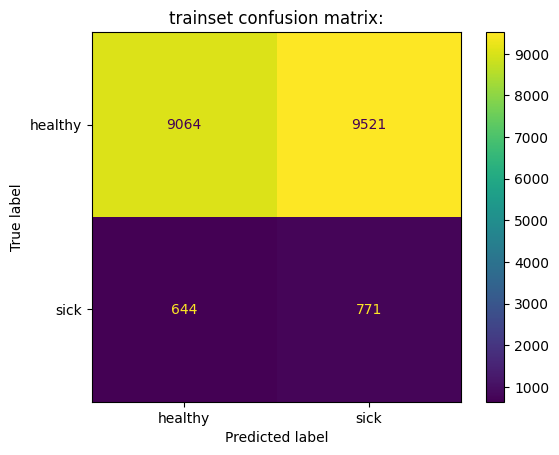

In [ ]:
import matplotlib.pyplot as plt 

print(classification_report(y_train, train_pred, target_names=["healthy","sick"]))
conf = confusion_matrix(y_train, train_pred,labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=["healthy","sick"])
disp.plot()
plt.title("trainset confusion matrix:")
plt.show()

              precision    recall  f1-score   support

     healthy       0.92      0.21      0.35      9259
        sick       0.07      0.77      0.13       741

    accuracy                           0.26     10000
   macro avg       0.50      0.49      0.24     10000
weighted avg       0.86      0.26      0.33     10000



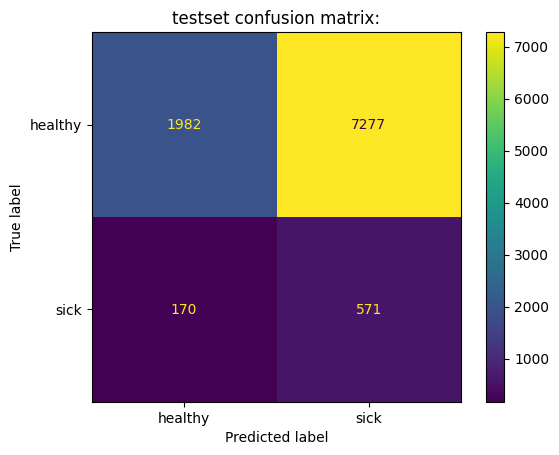

In [ ]:

print(classification_report(y_val, y_pred, target_names=["healthy","sick"]))
conf = confusion_matrix(y_val, y_pred,labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=["healthy","sick"])
disp.plot()
plt.title("testset confusion matrix:")
plt.show()